# Stock Price Prediction using RNN

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1920px-Recurrent_neural_network_unfold.svg.png)

### What is Stock Price Prediction?

Stock price prediction is the act of trying to determine the future of a company stock. This can be done by analyzing the past data.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

C:\Users\Gilbert\AppData\Local\Continuum\anaconda3\envs\ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


### Loading in Dataset

In [2]:
df = pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### Preprocessing and Feature Extraction

In [3]:
df = df['open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599]])

In [4]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263]])

In [6]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213]])

In [7]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [8]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [9]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [10]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Building Model

In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [14]:
model = load_model('stock_prediction.h5')

### Visualizing Results

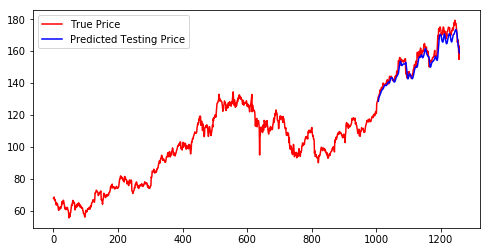

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

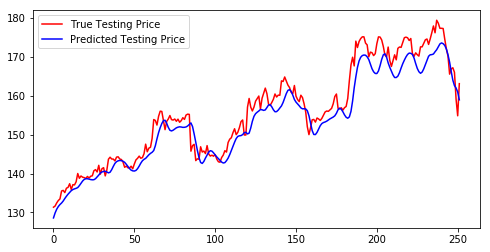

In [16]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [17]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[158.93146, 264.7039, 322.72485, 338.33698, 344.51175, 346.56482, 347.41708, 347.84174, 348.11456, 348.32028, 348.48422, 348.61807, 348.7292, 348.822, 348.90002, 348.9662, 349.02246, 349.0703, 349.11133, 349.14648, 349.17664, 349.20248, 349.22473, 349.2437, 349.26013, 349.2741, 349.28613, 349.29666, 349.30576, 349.31372, 349.32074, 349.32672, 349.332, 349.33603, 349.339, 349.3408, 349.34155, 349.34195, 349.3431, 349.34628, 349.3531, 349.36417, 349.3784, 349.39267, 349.4014, 349.3969, 349.37064, 349.31384, 349.22308, 349.10657, 348.96777, 348.96805, 348.9681, 348.9682, 348.96823, 348.96826, 348.96826, 348.96835, 348.96832, 348.96832, 348.96832, 348.96832, 348.96832, 348.96835, 348.96835, 348.96832, 348.96832, 348.96832, 348.96835, 348.96835, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.968

## Resources

<ul>
    <li><a href="https://en.wikipedia.org/wiki/Stock_market_prediction">Stock market prediction (Wikipedia)</a></li>
    <li><a href="https://towardsdatascience.com/stock-prediction-in-python-b66555171a2">Stock Prediction in Python (William Koehrsen on Medium)</a></li>
    <li><a href="https://github.com/topics/stock-price-prediction?l=python">Stock Price Prediction (Github Respositorys)</a></li>
    <li><a href="https://programmingwithgilbert.firebaseapp.com/videos/machine-learning-explained/recurrent-neural-networks-lstm-explained">Recurrent Neural Networks / LSTM Explained (my own video)</a></li>
</ul>